# Understanding probability

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Univariate data

## A Gaussian distribution

In [2]:
# Define a Gaussian distribution
# Parameters
mean = 0
std = 1
# Use scipy.stats to create a Gaussian distribution
true_dist = stats.norm(mean, std)

### Probability Density Function and Cumulative Distribution Function

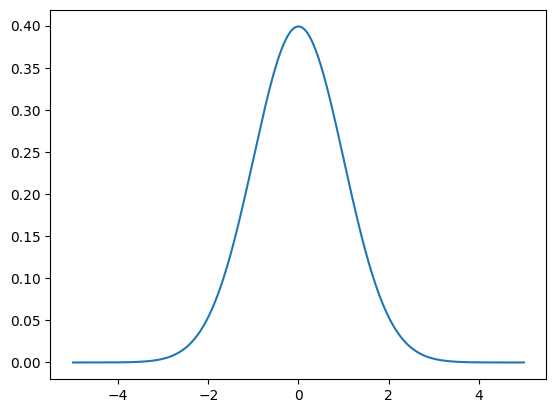

In [3]:
# Plot the true distribution
x = np.linspace(-5, 5, 1000)
plt.plot(
    x,
    true_dist.pdf(x),
    label='True Distribution'
)

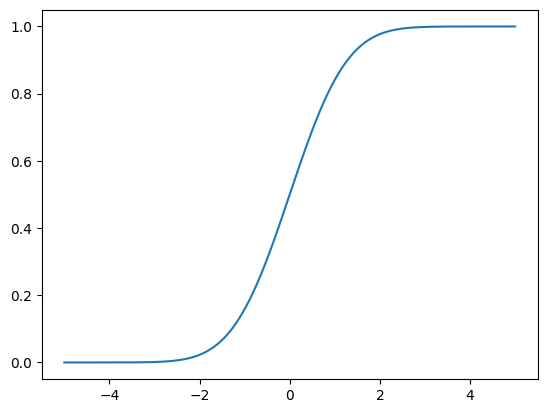

In [4]:
# Plot the CDF of the true distribution
plt.plot(
    x,
    true_dist.cdf(x),
    label='True CDF'
)

### Drawing or sampling from a Gaussian distribution

In [5]:
# Draw samples from the true distribution
n_samples = 1000
# Use the rvs method of scipy.stats distributions to draw samples
samples = true_dist.rvs(n_samples)

### Sufficient statistis of observed samples

In [6]:
# Compute sufficient statistics of the observed data, manually
empirical_mean = np.sum(samples) / n_samples
empirical_std = np.sqrt(np.sum((samples - empirical_mean) ** 2) / n_samples)
empirical_var = np.sum((samples - empirical_mean) ** 2) / n_samples

In [7]:
# Compute sufficient statistics of the observed data, using numpy
sample_mean = np.mean(samples)
sample_std = np.std(samples)
sample_var = np.var(samples)


In [8]:
# Compare the empirical and true sufficient statistics
# Mean comparison
print('True mean:', mean)
print('Empirical mean:', empirical_mean)
print('Sample mean:', sample_mean)
print('Empirical mean to true mean MSE' , np.mean((empirical_mean - mean) ** 2))
print('Sample mean to true mean MSE' , np.mean((sample_mean - mean) ** 2))

True mean: 0
Empirical mean: -0.028290085264589572
Sample mean: -0.028290085264589572
Empirical mean to true mean MSE 0.0008003289242777481
Sample mean to true mean MSE 0.0008003289242777481


In [9]:
# Variance comparison
print('True variance:', std ** 2)
print('Empirical variance:', empirical_var)
print('Sample variance:', sample_var)
print('Empirical variance to true variance MSE' , np.mean((empirical_var - std ** 2) ** 2))
print('Sample variance to true variance MSE' , np.mean((sample_var - std ** 2) ** 2))

True variance: 1
Empirical variance: 1.0208343216567726
Sample variance: 1.0208343216567726
Empirical variance to true variance MSE 0.0004340689588978625
Sample variance to true variance MSE 0.0004340689588978625


### Probabilities of samples: their histogram and density function

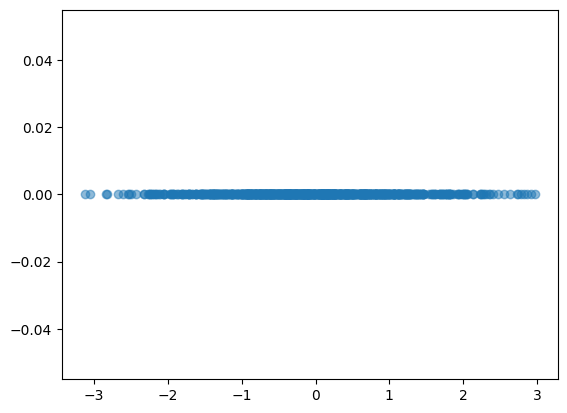

In [10]:
# Plot the samples, as points
plt.scatter(
    samples,
    np.zeros(n_samples),
    alpha=0.5,
    label='Samples'
)

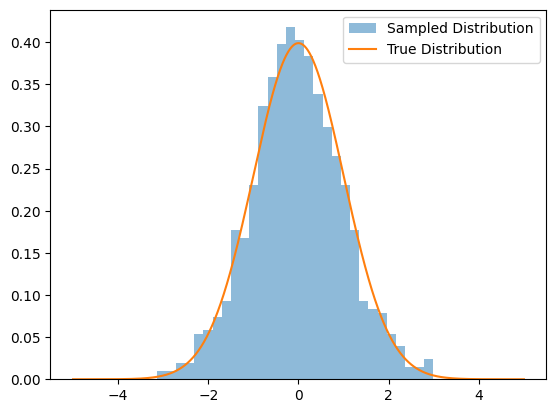

In [11]:
# Plot the histogram of the samples
plt.hist(
    samples,
    bins=30,
    density=True,
    alpha=0.5,
    label='Sampled Distribution'
)
# Along with the true distribution
plt.plot(
    x,
    true_dist.pdf(x),
    label='True Distribution'
)
plt.legend()
plt.show()

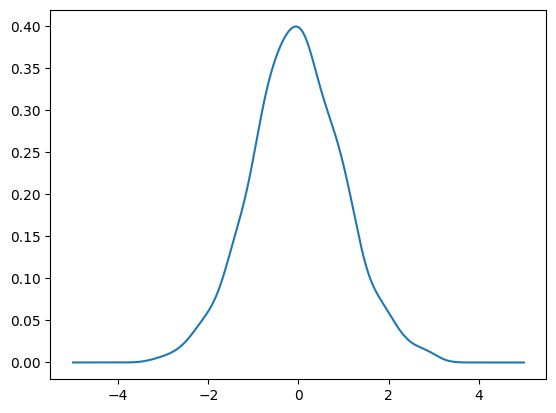

In [12]:
# Compute the empirical distribution, using a KDE based estimator
# We will use the Gaussian KDE 
emp_dist = stats.gaussian_kde(samples)

# Plot the KDE-based empirical distribution
plt.plot(
    x,
    emp_dist.pdf(x),
    label='Empirical Distribution'
)

### Cumulative probability of samples: their cumulative distribution function

The cumulative distribution function of a real-valued random variable $X$ is the function given by:

$ F_{X}(x)=\operatorname {P} (X\leq x) $

where the right-hand side represents the probability that the random variable $X$ takes on a value less than or equal to $x$.

In [13]:
# Define the empirical CDF
def compute_empirical_cdf(x, samples):
    n_samples = len(samples)
    emp_cdf = np.zeros_like(x)
    for i, x_val in enumerate(x):
        emp_cdf[i] = np.sum(samples <= x_val) / n_samples
    return emp_cdf

In [14]:
# Compute the empirical CDF of the drawn samples
emp_cdf = compute_empirical_cdf(x, samples)

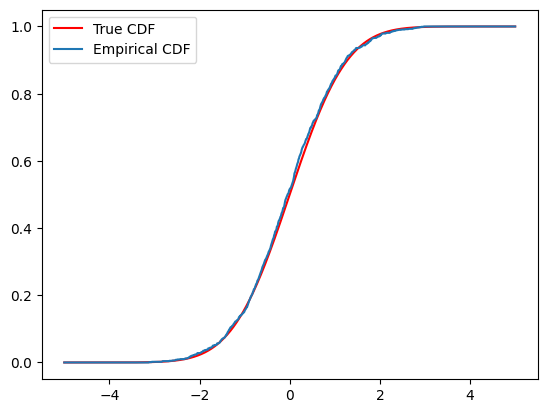

In [15]:
# Plot the empirical CDF, compare to true CDF
plt.plot(
    x,
    true_dist.cdf(x),
    color='red',
    label='True CDF'
)
plt.plot(
    x,
    emp_cdf,
    label='Empirical CDF'
)
plt.legend()
plt.show()



### Probabilities of samples: the probability of an event

In [16]:
# Define the event: $x \in [a, b]$
a = -1
b = 1

In [17]:
# Compute the probability of the event, using the samples
event = (samples >= a) & (samples <= b)
emp_prob_event = np.sum(event) / n_samples

In [18]:
# Compute the probability of the event, using the empirical cdf
emp_prob_event_cdf = emp_cdf[np.argmax(x >= b)] - emp_cdf[np.argmax(x >= a)]

# Compute the probability of the event, using the true cdf
true_prob_event = true_dist.cdf(b) - true_dist.cdf(a)

In [19]:
# Print the results and compare
print('Empirical probability of the event:', emp_prob_event)
print('Empirical probability of the event (CDF):', emp_prob_event_cdf)
print('True probability of the event:', true_prob_event)
print('Empirical probability to true probability MSE' , np.mean((emp_prob_event - true_prob_event) ** 2))
print('Empirical probability (CDF) to true probability MSE' , np.mean((emp_prob_event_cdf - true_prob_event) ** 2))

Empirical probability of the event: 0.695
Empirical probability of the event (CDF): 0.696
True probability of the event: 0.6826894921370859
Empirical probability to true probability MSE 0.00015154860384286988
Empirical probability (CDF) to true probability MSE 0.0001771696195686981


### Study how the computation the probability of the event changes, over different number of samples

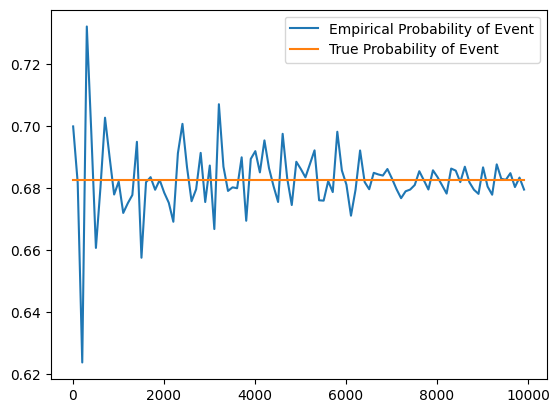

In [20]:
# Define the event: $x \in [a, b]$
a = -1
b = 1

# Compute the probability of the event, using different number of samples
n_samples_list = np.arange(10, 10000, 100)
emp_prob_event_list = []
for n_samples in n_samples_list:
    samples = true_dist.rvs(n_samples)
    event = (samples >= a) & (samples <= b)
    emp_prob_event = np.sum(event) / n_samples
    emp_prob_event_list.append(emp_prob_event)

# Compute the probability of the event, using the true cdf
true_prob_event = true_dist.cdf(b) - true_dist.cdf(a)

# Plot the results
plt.plot(
    n_samples_list,
    emp_prob_event_list,
    label='Empirical Probability of Event'
)
plt.plot(
    n_samples_list,
    [true_prob_event] * len(n_samples_list),
    label='True Probability of Event'
)
plt.legend()
plt.show()


### Study how with more data, the empirical distributions converge to the true distribution


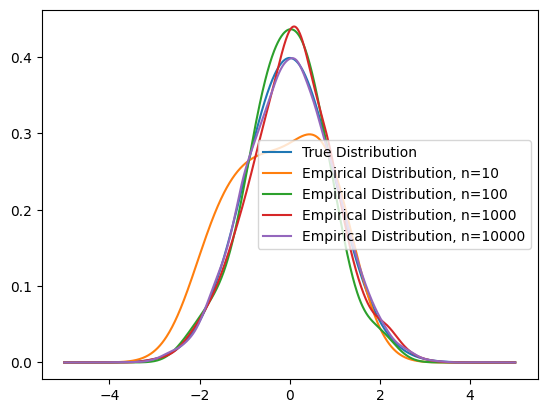

In [21]:
# First, draw true PDF
plt.plot(
    x,
    true_dist.pdf(x),
    label='True Distribution'
)

# Now, draw the empirical PDF for different sample sizes
for n_samples in [10, 100, 1000, 10000]:
    samples = true_dist.rvs(n_samples)
    emp_dist = stats.gaussian_kde(samples)
    plt.plot(
        x,
        emp_dist.pdf(x),
        label=f'Empirical Distribution, n={n_samples}'
    )
plt.legend()
plt.show()


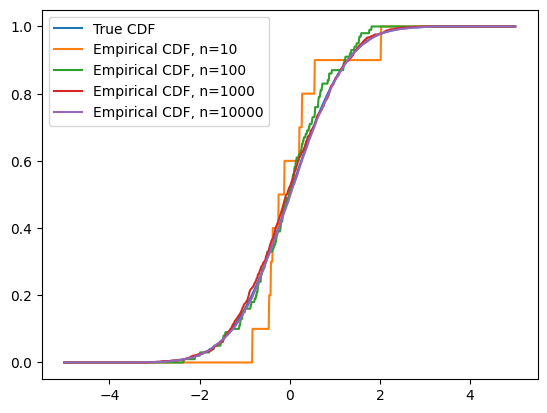

In [22]:
# Compare CDFs
# Draw the true CDF
plt.plot(
    x,
    true_dist.cdf(x),
    label='True CDF'
)

# Now, draw the empirical CDF for different sample sizes
for n_samples in [10, 100, 1000, 10000]:
    samples = true_dist.rvs(n_samples)
    emp_cdf = compute_empirical_cdf(x, samples)
    plt.plot(
        x,
        emp_cdf,
        label=f'Empirical CDF, n={n_samples}'
    )
plt.legend()
plt.show()

## Repeat the above analysis, but for different distributions


In [23]:
# Draw from the exponential distribution
# The parameters of the exponential distribution
lambda_param = 0.5
# Use scipy.stats to create an exponential distribution
true_dist = stats.expon(scale=1 / lambda_param)

# x-space for plotting
x = np.linspace(0, 5, 1000)

In [24]:
# Compute the sufficient statistics of the true distribution
true_mean = true_dist.mean()
true_var = true_dist.var()

# Draw samples from the true distribution
n_samples = 1000
samples = true_dist.rvs(n_samples)

# Compute the sufficient statistics of the observed data
sample_mean = np.mean(samples)
sample_var = np.var(samples)

# Compare and print the results
print('True mean:', true_mean)
print('Sample mean:', sample_mean)
print('True mean to sample mean MSE' , np.mean((true_mean - sample_mean) ** 2))
print('True variance:', true_var)
print('Sample variance:', sample_var)
print('True variance to sample variance MSE' , np.mean((true_var - sample_var) ** 2))

True mean: 2.0
Sample mean: 1.9792483014598574
True mean to sample mean MSE 0.0004306329923009558
True variance: 4.0
Sample variance: 3.9764883899111556
True variance to sample variance MSE 0.0005527958089698495


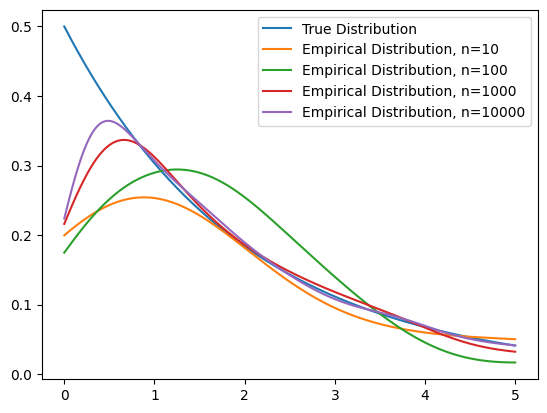

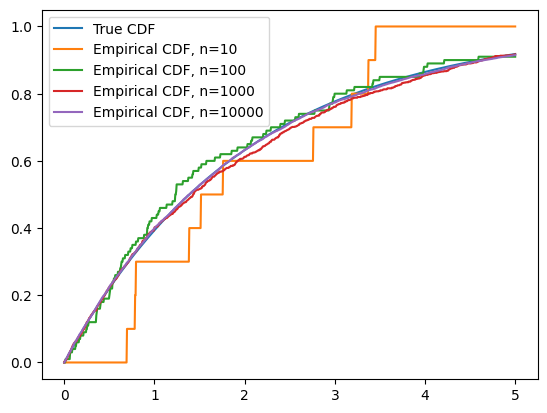

In [25]:
# First, compare PDFs
plt.plot(
    x,
    true_dist.pdf(x),
    label='True Distribution'
)
for n_samples in [10, 100, 1000, 10000]:
    samples = true_dist.rvs(n_samples)
    emp_dist = stats.gaussian_kde(samples)
    plt.plot(
        x,
        emp_dist.pdf(x),
        label=f'Empirical Distribution, n={n_samples}'
    )
plt.legend()
plt.show()

# Then, compare CDFs
plt.plot(
    x,
    true_dist.cdf(x),
    label='True CDF'
)
for n_samples in [10, 100, 1000, 10000]:
    samples = true_dist.rvs(n_samples)
    emp_cdf = compute_empirical_cdf(x, samples)
    plt.plot(
        x,
        emp_cdf,
        label=f'Empirical CDF, n={n_samples}'
    )
plt.legend()
plt.show()


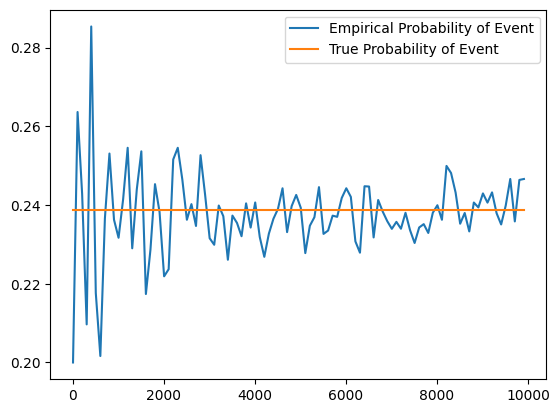

In [26]:
# Compare the computation the probability of the event, over different number of samples
# Define the event: $x \in [a, b]$
a = 1
b = 2

# Compute the probability of the event, using different number of samples
n_samples_list = np.arange(10, 10000, 100)
emp_prob_event_list = []
for n_samples in n_samples_list:
    samples = true_dist.rvs(n_samples)
    event = (samples >= a) & (samples <= b)
    emp_prob_event = np.sum(event) / n_samples
    emp_prob_event_list.append(emp_prob_event)

# Compute the probability of the event, using the true cdf
true_prob_event = true_dist.cdf(b) - true_dist.cdf(a)

# Plot the results
plt.plot(
    n_samples_list,
    emp_prob_event_list,
    label='Empirical Probability of Event'
)
plt.plot(
    n_samples_list,
    [true_prob_event] * len(n_samples_list),
    label='True Probability of Event'
)
plt.legend()
plt.show()

## Extend the above comparisons to multi-dimensional distributions

## Multivariate Gaussian

### Define a multi-variate distribution

### Draw from a multi-variate distribution

### Plot the multi-variate distribution

### Plot the marginals of the multi-variate distribution

### Plot the conditionals of the multi-variate distribution